In [1]:
import numpy as np
import utils

%matplotlib widget

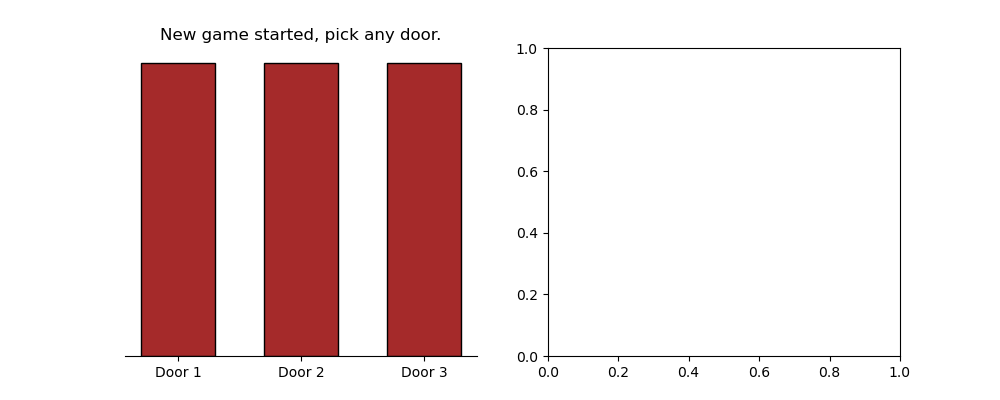

ZeroDivisionError: division by zero

In [2]:
game = utils.monty_hall_game()

In [3]:
def monty_hall(switch):
    # All doors have a goat initially
    doors = np.array([0, 0, 0])

    # Randomnly decide which door will have a car
    winner_index = np.random.randint(0, 3)

    # Place the car in the winner door
    doors[winner_index] = 1

    # Participant selects a door at random
    choice = np.random.randint(0, 3)

    # Get doors that can be opened (host cannot open the door chosen or the one with the car)
    openable_doors = [i for i in range(3) if i not in (winner_index, choice)]

    # Host opens one of the available doors at random
    door_to_open = np.random.choice(openable_doors)

    # Switch to the other available door (the one that is not the original choice or the opened one)
    if switch:
        choice = [i for i in range(3) if i not in (choice, door_to_open)][0]

    # Return 1 if you open a door with a car, 0 otherwise
    return doors[choice]

In [6]:
utils.success_rate_plot(monty_hall)

interactive(children=(RadioButtons(description='Switch Doors?', index=1, options=(True, False), value=False), …

In [4]:
def generalized_monty_hall(switch, n=3, k=1):
    if not (0 <= k <= n - 2):
        raise ValueError(
            "k must be between 0 and n-2, so the Host can leave at least 1 openable door!"
        )

    # All doors have a goat initially
    doors = np.array([0 for _ in range(n)])

    # Decide which door will have a car
    winner = np.random.randint(0, n)

    # Place the car in the winner door
    doors[winner] = 1.0

    # Participant selects a door at random
    choice = np.random.randint(0, n)

    # Get doors that can be opened (host cannot open the door chosen or the one with the car)
    openable_doors = [i for i in range(n) if i not in (winner, choice)]

    # Host open k of the available doors at random
    door_to_open = np.random.choice(openable_doors, size=k, replace=False)

    # Switch to the other available door (the one that is not the original choice or the opened one)
    if switch:
        choices = [
            i
            for i in range(n)
            if i not in np.array(choice) and i not in np.array(door_to_open)
        ]
        # Player chooses another door at random
        choice = np.random.choice(choices)

    # Return 1 if you open a door with a car, 0 otherwise
    return doors[choice]

In [5]:
utils.success_rate_plot(generalized_monty_hall)

interactive(children=(RadioButtons(description='Switch Doors?', index=1, options=(True, False), value=False), …